# Photon source measurement 2020-12-21
- Loaded in source
- Very unstable with respect to magnetic field. Always jumping

In [3]:
%matplotlib notebook
import logging

from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from matplotlib import cm
import scqubits as scq
from scipy.optimize import curve_fit
from quantum_builder import QuantumBuilder


plt.style.use('my_official')

FLUX = float
FLUX_NUMBER = int
cos = np.cos
sin = np.sin
pi = np.pi

fF = 10 ** (-15)
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}
CMAPS =  ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
COLORMAP_01 = ["#79cdcd", "#eead0e", "#9a37ff", "#00ee76"]
COLORMAP_12 = plt.get_cmap('Reds')
COLORMAP_ENERGY = plt.get_cmap('viridis')
COLORMAP_STATE = plt.get_cmap('hsv')

Phi0 = 2.067 * 10**(-15)

# Spectrum

## Spectrum 03

In [4]:
# Experiment
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_spectrum_03.vi.txt"
offset = -0.538
multiplier = 1 / (0.1578 + 0.154 + 0.05)

# From expected geometry
# Distances will be in µm
AREA_µm2 = 4.2 * 5.8

no_100x100_jj_squares = 1.2**2

L_gate = 25
C_gate = (L_gate / 10) * fF

L_transmon = 350
S_transmon = 24
C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

# Hard coded fitting
EC = 0.16
EJ0 = 30

N_ext_list = [0]
flux_ext_list = np.linspace(-0.4, 0.4, 101)


transmon_expected = QuantumBuilder.build_transmon_qubit(
    {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": no_100x100_jj_squares,
        "number_of_charge_states": 21,
    }, logging_level=logging.INFO,
)
simulation = transmon_expected.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list,
    flux_ext_list=flux_ext_list,
    number_of_levels_to_simulate=3,
    use_sparse_matrix=False)

transmon_fitted = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon_fitted.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_ext_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
scq_01 = scq_energies[:, 1]

# Experiment
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    qubit_data = np.loadtxt(lines)
# Convert mA to flux number
qubit_data[:, 0] = qubit_data[:, 0] * AREA_µm2 / (Phi0 * 10**(16))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(flux_ext_list, scq_01,
        linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=8,
        alpha=0.2
        )

ax.plot(qubit_data[:, 0] * multiplier - offset, qubit_data[:, 1],
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")

# transition01 = simulation["eigvals"][0, :, 1] - simulation["eigvals"][0, :, 0]
# transition12 = simulation["eigvals"][0, :, 2] - simulation["eigvals"][0, :, 1]
# ax.plot(flux_ext_list, transition01,
#         linestyle="-",
#         color=MY_COLOURS["DarkBlue"],
#         label="Expected"
#         )

# ax.set_xticks([-2, -1, 0, 1, 2])
# ax.set_ylim([6, 9])
# ax.set_xlim([0.004, 0.009])
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.set_title(f"$E_C={transmon_expected.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_expected.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $E_{{J0-search}}={EJ0}$GHz", fontsize=16)
ax.legend()
plt.tight_layout()

transmon_qubit_constant_manager:132:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               0.15 (GHz)
EJ0:                                              61.13 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          21
jj_squares:                                       1.44 (fF)
C_transmon:                                       120.80 (fF)
C_gate:                                           2.50 (fF)

-----Derived Parameters-----
C_jj:                                             0.73 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             124.77 (fF)
Critical Current:                                 0.12 (µA)
JJ Resistance:                                    2.48 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>

## Spectrum 04

transmon_qubit_constant_manager:132:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               0.15 (GHz)
EJ0:                                              61.13 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          21
jj_squares:                                       1.44 (fF)
C_transmon:                                       120.80 (fF)
C_gate:                                           2.50 (fF)

-----Derived Parameters-----
C_jj:                                             0.73 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             124.77 (fF)
Critical Current:                                 0.12 (µA)
JJ Resistance:                                    2.48 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


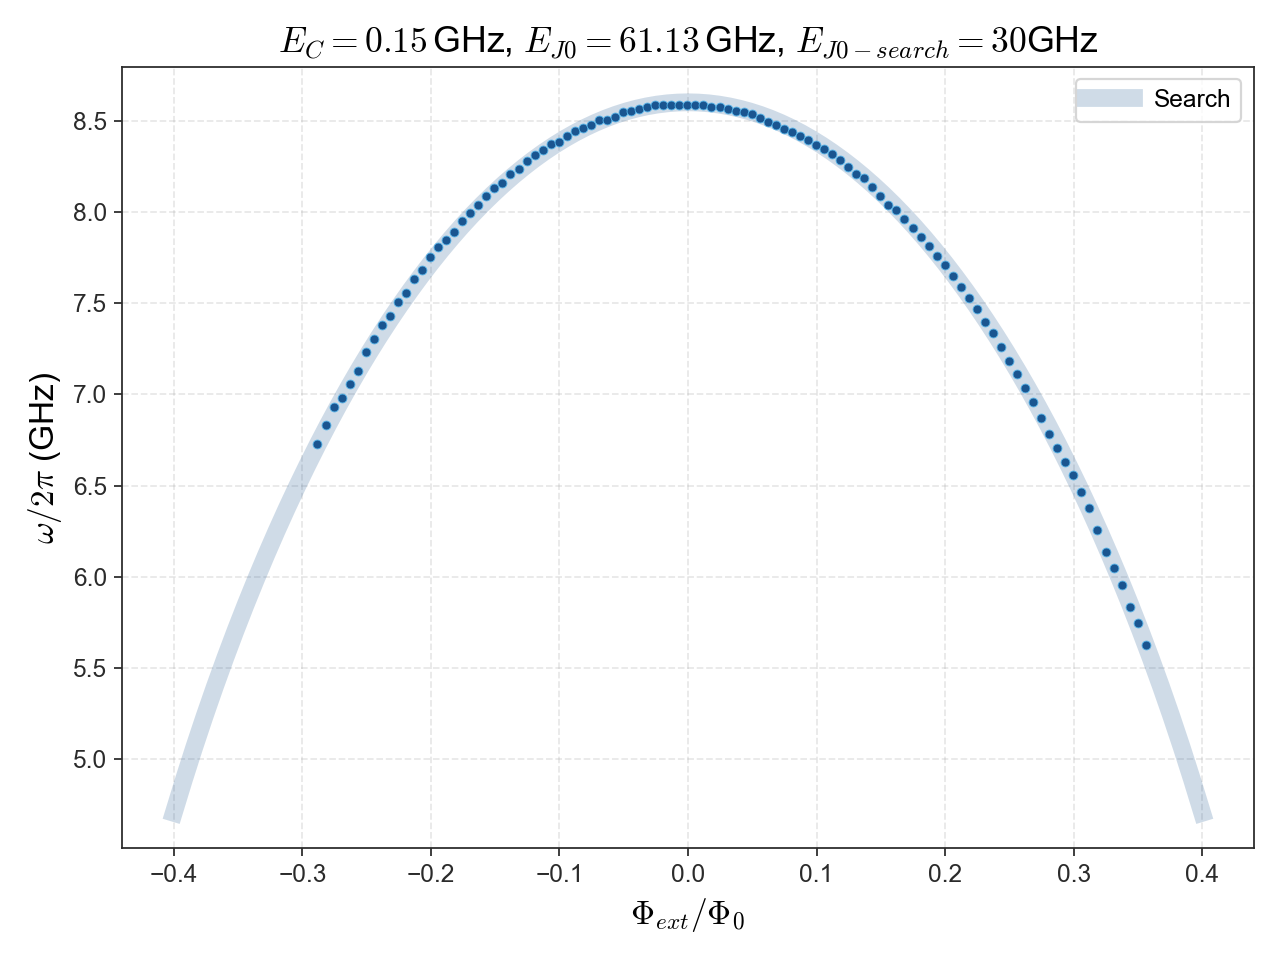

In [41]:
# Experiment
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_spectrum_04.vi.txt"
offset = -0.538 + 0.06
multiplier = 1 / (0.1578 + 0.154 + 0.065)

# From expected geometry
# Distances will be in µm
AREA_µm2 = 4.2 * 5.8

no_100x100_jj_squares = 1.2**2

L_gate = 25
C_gate = (L_gate / 10) * fF

L_transmon = 350
S_transmon = 24
C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

# Hard coded fitting
EC = 0.16
EJ0 = 30

N_ext_list = [0]
flux_ext_list = np.linspace(-0.4, 0.4, 101)


transmon_expected = QuantumBuilder.build_transmon_qubit(
    {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": no_100x100_jj_squares,
        "number_of_charge_states": 21,
    }, logging_level=logging.INFO,
)
simulation = transmon_expected.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list,
    flux_ext_list=flux_ext_list,
    number_of_levels_to_simulate=3,
    use_sparse_matrix=False)

transmon_fitted = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon_fitted.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_ext_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
scq_01 = scq_energies[:, 1]

# Experiment
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    qubit_data = np.loadtxt(lines)
# Convert mA to flux number
qubit_data[:, 0] = qubit_data[:, 0] * AREA_µm2 / (Phi0 * 10**(16))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(flux_ext_list, scq_01,
        linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=8,
        alpha=0.2
        )

ax.plot(qubit_data[:, 0] * multiplier - offset, qubit_data[:, 1],
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")

# transition01 = simulation["eigvals"][0, :, 1] - simulation["eigvals"][0, :, 0]
# transition12 = simulation["eigvals"][0, :, 2] - simulation["eigvals"][0, :, 1]
# ax.plot(flux_ext_list, transition01,
#         linestyle="-",
#         color=MY_COLOURS["DarkBlue"],
#         label="Expected"
#         )

# ax.set_xticks([-2, -1, 0, 1, 2])
# ax.set_ylim([6, 9])
# ax.set_xlim([0.004, 0.009])
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.set_title(f"$E_C={transmon_expected.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_expected.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $E_{{J0-search}}={EJ0}$GHz", fontsize=16)
ax.legend()
plt.tight_layout()

plt.savefig("./output/2020-12-21_(photon-source)/2020-12-18_spectrum_03.png")

## Spectrum 05

transmon_qubit_constant_manager:132:print_constants
⮑  ⚛ System setup with the following parameters (can choose to override them):

-----Energies-----
EC:                                               0.15 (GHz)
EJ0:                                              61.13 (GHz)

-----Raw Parameters-----
number_of_charge_states:                          21
jj_squares:                                       1.44 (fF)
C_transmon:                                       120.80 (fF)
C_gate:                                           2.50 (fF)

-----Derived Parameters-----
C_jj:                                             0.73 (fF)
C_𝛴 = C_transmon + C_gate + 2 * C_jj:             124.77 (fF)
Critical Current:                                 0.12 (µA)
JJ Resistance:                                    2.48 (k𝛀)


transmon_qubit_simulator:60:simulate
⮑  💻 Running simulation

transmon_qubit_simulator:98:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


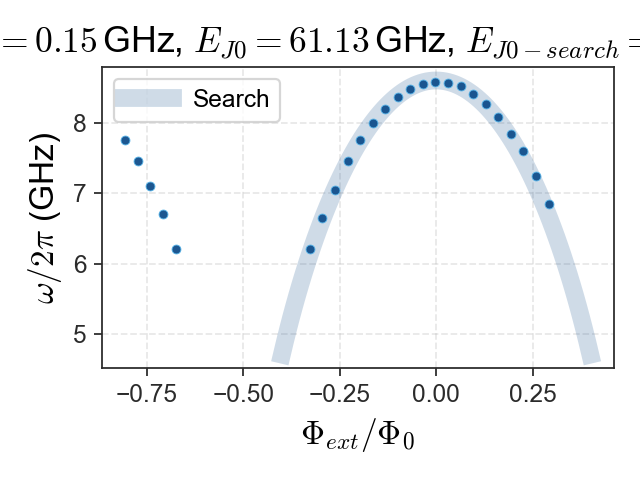

In [46]:
# Experiment
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_spectrum_05.vi.txt"
offset = -1.108
multiplier = 1 / (0.1578 + 0.154 + 0.05)

# From expected geometry
# Distances will be in µm
AREA_µm2 = 4.2 * 5.8

no_100x100_jj_squares = 1.2**2

L_gate = 25
C_gate = (L_gate / 10) * fF

L_transmon = 350
S_transmon = 24
C_transmon = (4 * (L_transmon - 2 * S_transmon) / 10) * fF

# Hard coded fitting
EC = 0.16
EJ0 = 30

N_ext_list = [0]
flux_ext_list = np.linspace(-0.4, 0.4, 101)


transmon_expected = QuantumBuilder.build_transmon_qubit(
    {
        "C_gate": C_gate,
        "C_transmon": C_transmon,
        "jj_squares": no_100x100_jj_squares,
        "number_of_charge_states": 21,
    }, logging_level=logging.INFO,
)
simulation = transmon_expected.transmon_qubit_simulator.simulate(
    N_ext_list=N_ext_list,
    flux_ext_list=flux_ext_list,
    number_of_levels_to_simulate=3,
    use_sparse_matrix=False)

transmon_fitted = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,  # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
scq_energies = transmon_fitted.get_spectrum_vs_paramvals(param_name='flux',
                                                  param_vals=flux_ext_list,
                                                  evals_count=2,
                                                  subtract_ground=True
                                                  ).energy_table
scq_01 = scq_energies[:, 1]

# Experiment
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    qubit_data = np.loadtxt(lines)
# Convert mA to flux number
qubit_data[:, 0] = qubit_data[:, 0] * AREA_µm2 / (Phi0 * 10**(16))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(flux_ext_list, scq_01,
        linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=8,
        alpha=0.2
        )

ax.plot(qubit_data[:, 0] * multiplier - offset, qubit_data[:, 1],
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")

# transition01 = simulation["eigvals"][0, :, 1] - simulation["eigvals"][0, :, 0]
# transition12 = simulation["eigvals"][0, :, 2] - simulation["eigvals"][0, :, 1]
# ax.plot(flux_ext_list, transition01,
#         linestyle="-",
#         color=MY_COLOURS["DarkBlue"],
#         label="Expected"
#         )

# ax.set_xticks([-2, -1, 0, 1, 2])
# ax.set_ylim([6, 9])
# ax.set_xlim([0.004, 0.009])
ax.set_xlabel("$\Phi_{ext}/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
ax.set_title(f"$E_C={transmon_expected.transmon_qubit_constant_manager.EC:.2f}\,$GHz, $E_{{J0}}={transmon_expected.transmon_qubit_constant_manager.EJ0:.2f}\,$GHz, $E_{{J0-search}}={EJ0}$GHz", fontsize=16)
ax.legend()
plt.tight_layout()

# Reflection

# Rabi

<IPython.core.display.Javascript object>


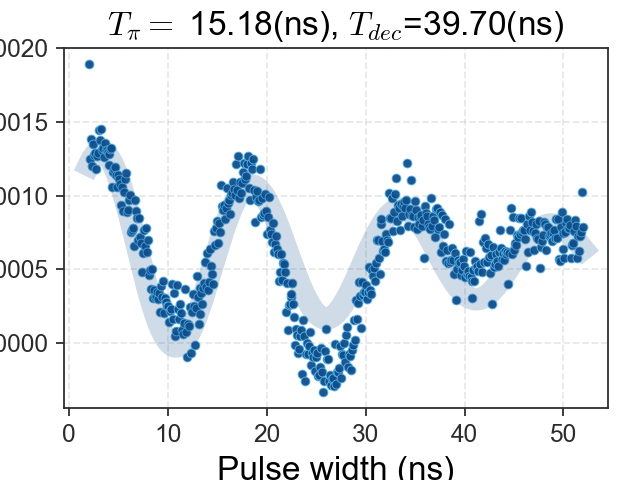

Text(0.5, 1.0, '$T_\\pi =$ 15.18(ns), $T_{dec}$=39.70(ns)')

In [24]:
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_10_rabi.vi.txt"
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    data = np.loadtxt(lines)
    
def fit_rabi(x, a, b, c, d, e, f):
    return a * np.sin(b * x + c) * np.exp(-x * d) + e * x + f

popt, pcov = curve_fit(fit_rabi, data[:,0], data[:,1])
bias_slope = data[:,0] * popt[4]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(data[:,0], data[:,1] - bias_slope,
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")
ax.plot(data[:,0], fit_rabi(data[:,0], *popt) - bias_slope,
               linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=10,
        alpha=0.2
       )

ax.set_xlabel("Pulse width (ns)", fontsize=15)
ax.set_ylabel("Amplitude (arb)", fontsize=15)
ax.set_title(f"$T_\pi =$ {2 * np.pi / popt[1]:.2f}(ns), $T_{{dec}}$={1/popt[3]:.2f}(ns)", fontsize=15)

<IPython.core.display.Javascript object>


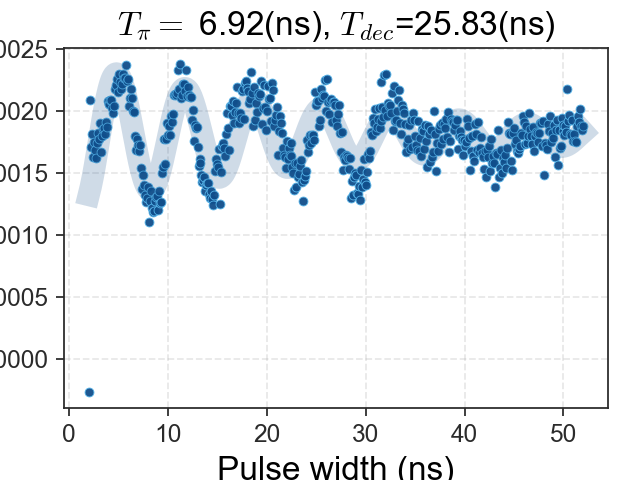

Text(0.5, 1.0, '$T_\\pi =$ 6.92(ns), $T_{dec}$=25.83(ns)')

In [23]:
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_12_rabi.vi.txt"
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    data = np.loadtxt(lines)
    
def fit_rabi(x, a, b, c, d, e, f):
    return a * np.sin(b * x + c) * np.exp(-x * d) + e * x + f

popt, pcov = curve_fit(fit_rabi, data[:,0], data[:,1])
bias_slope = data[:,0] * popt[4]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(data[:,0], data[:,1] - bias_slope,
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")
ax.plot(data[:,0], fit_rabi(data[:,0], *popt) - bias_slope,
               linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=10,
        alpha=0.2
       )

ax.set_xlabel("Pulse width (ns)", fontsize=15)
ax.set_ylabel("Amplitude (arb)", fontsize=15)
ax.set_title(f"$T_\pi =$ {2 * np.pi / popt[1]:.2f}(ns), $T_{{dec}}$={1/popt[3]:.2f}(ns)", fontsize=15)

## Rabi 13

<IPython.core.display.Javascript object>


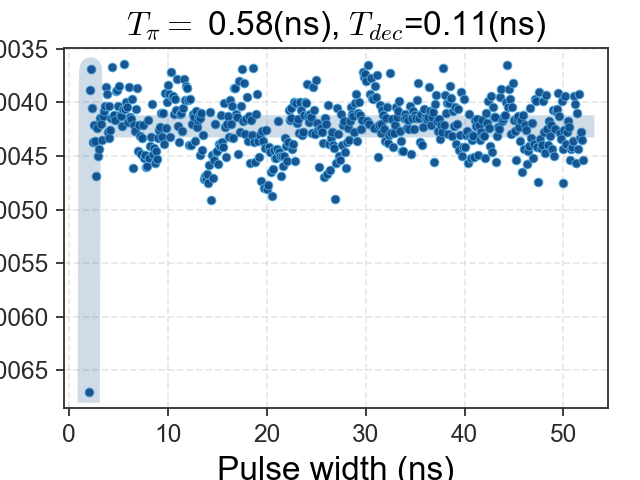

Text(0.5, 1.0, '$T_\\pi =$ 0.58(ns), $T_{dec}$=0.11(ns)')

In [38]:
FILE_NAME = "/Users/CCCP/creamy_seas/monday_starts_on_saturday/photon/lab-results/2020-12-21/2020-12-18_13_rabi.vi.txt"
INDEX = 2
with open(FILE_NAME) as fin:
    lines = (line for line in fin if not line.startswith('#'))
    data = np.loadtxt(lines)
    
def fit_rabi(x, a, b, c, d, e, f):
    return a * np.sin(b * x + c) * np.exp(-x * d) + e * x + f

popt, pcov = curve_fit(fit_rabi, data[:,0], data[:,INDEX])
bias_slope = data[:,0] * popt[4]

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(data[:,0], data[:,INDEX] - bias_slope,
        marker="o",
        color=MY_COLOURS["DarkBlue"],
        markeredgecolor="C2",
        markeredgewidth="0.4", markersize=4, alpha=0.95,
        linestyle="")
ax.plot(data[:,0], fit_rabi(data[:,0], *popt) - bias_slope,
               linestyle="-",
        color=MY_COLOURS["DarkBlue"],
        label="Search",
        linewidth=10,
        alpha=0.2
       )

ax.set_xlabel("Pulse width (ns)", fontsize=15)
ax.set_ylabel("Amplitude (arb)", fontsize=15)
ax.set_title(f"$T_\pi =$ {2 * np.pi / popt[1]:.2f}(ns), $T_{{dec}}$={1/popt[3]:.2f}(ns)", fontsize=15)


# T1 with VNA

# T1 with digitiser